In [1]:
# Experiment aims to identify if background color stimuli affects interpretation (identification?) of miscolored words.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
# Loading in data and taking a look at first few rows.
data = pd.read_csv('results10.csv')
data.head()

,Unnamed: 0,Results.reception.time,MD5.hash.of.participant.s.IP.address,Controller.name,Order.number.of.item,Inner.element.number,Label,Latin.Square.Group,PennElementType,PennElementName,Parameter,Value,EventTime,Type,Correct,ReadingTime,Comments
0,1,1719257367,d9d3b3ac06384ebac41201c32396e234,PennController,0,0,instructions,NaN,PennController,0,_Trial_,Start,1719257295059,NaN,NaN,NaN,NaN
1,2,1719257367,d9d3b3ac06384ebac41201c32396e234,PennController,0,0,instructions,NaN,PennController,0,_Trial_,End,1719257318959,NaN,NaN,NaN,NaN
2,3,1719257367,d9d3b3ac06384ebac41201c32396e234,PennController,1,0,practice-trial,NaN,PennController,1,_Trial_,Start,1719257318964,NaN,NaN,NaN,NaN
3,4,1719257367,d9d3b3ac06384ebac41201c32396e234,PennController,1,0,practice-trial,NaN,Scale,practiceAnswer,Choice,Right (J),1719257325031,NaN,NaN,NaN,NaN
4,5,1719257367,d9d3b3ac06384ebac41201c32396e234,PennController,1,0,practice-trial,NaN,PennController,1,_Trial_,End,1719257326042,NaN,NaN,NaN,NaN


In [3]:
# All of this is data prep / cleaning for the graph.

# Keeping only experimental trials:
data = data[data['Label'] == 'trials']

# Delete any that don't have any reading times.
data = data[data['ReadingTime'] != "NaN"]

# Keep only the ones where the parameter was a choice (participant chose).
data = data[data['Parameter'] == "Choice"]

# Delete any rows where the type (colored backgroud or normal) was none. (Doesn't work for some reason? Line below does it though.)
data = data[data['Type'] != "NaN"]

# Keep only rows where only a selection of left or right was made.
data = data[data['Value'].isin(['Left (F)', 'Right (J)'])]

data

,Unnamed: 0,Results.reception.time,MD5.hash.of.participant.s.IP.address,Controller.name,Order.number.of.item,Inner.element.number,Label,Latin.Square.Group,PennElementType,PennElementName,Parameter,Value,EventTime,Type,Correct,ReadingTime,Comments
9,10,1719257367,d9d3b3ac06384ebac41201c32396e234,PennController,3,0,trials,NaN,Scale,answer,Choice,Right (J),1719257336792,normal,True,3385.0,NaN
13,14,1719257367,d9d3b3ac06384ebac41201c32396e234,PennController,4,0,trials,NaN,Scale,answer,Choice,Left (F),1719257341559,colored,True,3744.0,NaN
17,18,1719257367,d9d3b3ac06384ebac41201c32396e234,PennController,5,0,trials,NaN,Scale,answer,Choice,Right (J),1719257346025,normal,False,3449.0,NaN
21,22,1719257367,d9d3b3ac06384ebac41201c32396e234,PennController,6,0,trials,NaN,Scale,answer,Choice,Right (J),1719257350010,normal,True,2966.0,NaN
25,26,1719257367,d9d3b3ac06384ebac41201c32396e234,PennController,7,0,trials,NaN,Scale,answer,Choice,Left (F),1719257353325,colored,True,2294.0,NaN
29,30,1719257367,d9d3b3ac06384ebac41201c32396e234,PennController,8,0,trials,NaN,Scale,answer,Choice,Left (F),1719257358810,colored,False,4468.0,NaN
33,34,1719257367,d9d3b3ac06384ebac41201c32396e234,PennController,9,0,trials,NaN,Scale,answer,Choice,Right (J),1719257363009,normal,True,3184.0,NaN
37,38,1719257367,d9d3b3ac06384ebac41201c32396e234,PennController,10,0,trials,NaN,Scale,answer,Choice,Left (F),1719257366827,colored,True,2797.0,NaN
48,49,1719259196,1a1b3a36d901be7f0d8af758ff3d10fa,PennController,3,0,trials,NaN,Scale,answer,Choice,Right (J),1719259164051,normal,True,1889.0,NaN
52,53,1719259196,1a1b3a36d901be7f0d8af758ff3d10fa,PennController,4,0,trials,NaN,Scale,answer,Choice,Left (F),1719259166487,colored,True,1423.0,NaN


In [4]:
# Prepping data again, dropping all columns until we only have "Type", and "ReadingTime".

data = data.drop(columns=['MD5.hash.of.participant.s.IP.address', 'Inner.element.number', 'PennElementType',
                   'PennElementName']).reset_index()

data = data.drop(columns=['index', 'Order.number.of.item',
                   'Label', 'Parameter', 'Value', 'EventTime', 'Correct']).reset_index()

data = data.drop(columns = ['Unnamed: 0', 'Results.reception.time', "Controller.name", 'Latin.Square.Group', 'Comments'])

data = data.drop(columns = ['index'])

data = data[data['Type'] != 'NaN']

data

,Type,ReadingTime
0,normal,3385.0
1,colored,3744.0
2,normal,3449.0
3,normal,2966.0
4,colored,2294.0
5,colored,4468.0
6,normal,3184.0
7,colored,2797.0
8,normal,1889.0
9,colored,1423.0


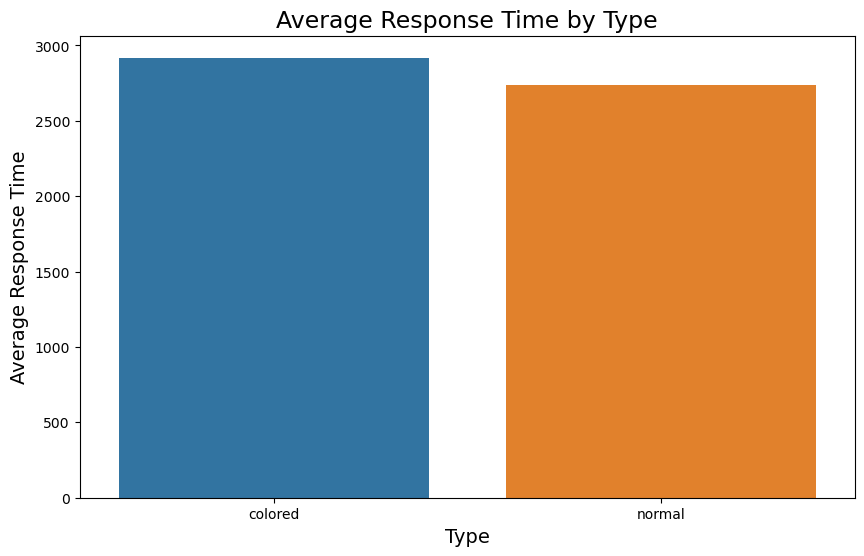

In [5]:
# Graph!

mean_reading_times = data.groupby('Type')['ReadingTime'].mean().reset_index()
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Type', y = 'ReadingTime', data = mean_reading_times).set_title('Average Response Time by Type', fontsize = 17)
plt.xlabel('Type', fontsize = 14)
plt.ylabel('Average Response Time', fontsize = 14)

plt.show()

Text(0.5, 1.0, 'Average Response Time by Question')

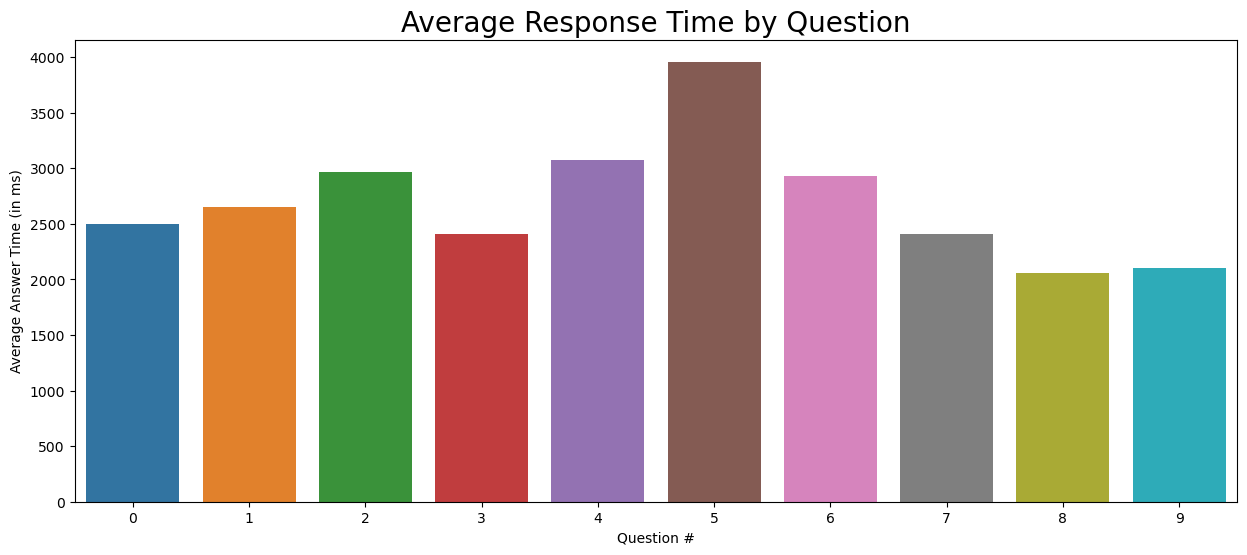

In [6]:
# Sort by time taken to answer each question.

numbers = range(10)
mean_times = []

for num in numbers:
    # Identify every 8th entry.
    num_data = data.iloc[num::8]
    
    # Calculate the mean for that data.
    mean_time = num_data['ReadingTime'].mean()
    
    # Add it to array of individual question times.
    mean_times.append(mean_time)

plt.figure(figsize = (15, 6))

# Creates a data frame to plot.
bar2_data = pd.DataFrame ({
    "Question #": numbers,
    "Average Answer Time (in ms)": mean_times
})

sns.barplot(x = "Question #", y = "Average Answer Time (in ms)", data = bar2_data).set_title("Average Response Time by Question", fontsize = 20)


In [7]:
# # Keeping only rows where 'PennElementType' is 'scale' or 'canvas'
# # Merging two data sets to calculate reading time (time when they entered the choice - time that the question was originally displayed), through EventTime
# data = data[data['PennElementType'].isin(['Scale', 'Canvas'])]
# data = data[data['EventTime'] != 'Never']
# data = data[data['index'] > 52]
# canvas_data = data[data['PennElementType'] == 'Canvas']
# scale_data = data[data['PennElementType'] == 'Scale']

# merged_data = pd.merge(
#     canvas_data,
#     scale_data,
#     on=['MD5.hash.of.participant.s.IP.address', 'Order.number.of.item', 'Inner.element.number', 'Label', 'Word', 'Word1', 'Word2', 'Color1', 'Color2', 'Background1', 'Background2', 'Question', 'Correct'],
#     suffixes=('_canvas', '_scale')
# )
# merged_data['EventTime_difference'] = merged_data['EventTime_scale'].astype(int) - merged_data['EventTime_canvas'].astype(int)
# result = merged_data[['MD5.hash.of.participant.s.IP.address', 'Order.number.of.item', 'Inner.element.number', 'Label', 'Word', 'Question', 'Correct', 'EventTime_difference']]
# result